### Importing Necessary Libraries 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import statsmodels.stats.api as sms
import statsmodels
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Reading the Data

In [3]:
df=pd.read_csv('GDP_Country.csv')
df=df.set_index(['Country','Region'])

In [4]:
df.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [21]:
df.shape

(227, 18)

In [22]:
df.head(2)

,,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,Region,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [33]:
df.isnull().sum()/len(df)*100

Population                            0.000000
Area_sqm                              0.000000
Pop_Density_per sqm                   0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         0.884956
Infant mortality (per 1000 births)    0.884956
GDP ($ per capita)                    0.000000
Literacy (%)                          7.522124
Phones (per 1000)                     1.327434
Arable (%)                            0.884956
Crops (%)                             0.884956
Other (%)                             0.884956
Climate                               9.734513
Birthrate                             0.884956
Deathrate                             1.327434
Agriculture                           6.194690
Industry                              6.637168
Service                               6.637168
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EA6045700>,
      dtype=object)

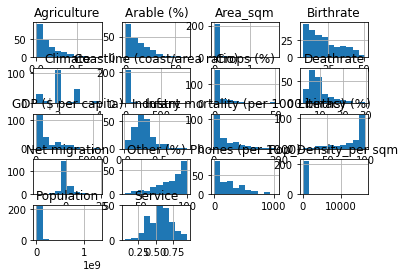

In [11]:
df.hist()

In [24]:
df['GDP ($ per capita)'].isnull().sum()

1

In [29]:
df=df.dropna(subset=['GDP ($ per capita)'])

In [30]:
df['GDP ($ per capita)'].isnull().sum()

0

In [31]:
df['GDP ($ per capita)']

Country             Region                             
Afghanistan         ASIA (EX. NEAR EAST)                     700.0
Albania             EASTERN EUROPE                          4500.0
Algeria             NORTHERN AFRICA                         6000.0
American Samoa      OCEANIA                                 8000.0
Andorra             WESTERN EUROPE                         19000.0
                                                            ...   
Wallis and Futuna   OCEANIA                                 3700.0
West Bank           NEAR EAST                                800.0
Yemen               NEAR EAST                                800.0
Zambia              SUB-SAHARAN AFRICA                       800.0
Zimbabwe            SUB-SAHARAN AFRICA                      1900.0
Name: GDP ($ per capita), Length: 226, dtype: float64

In [32]:
df.shape

(226, 18)

In [34]:
df.describe()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.260000e+02,2.260000e+02,226.000000,226.000000,224.000000,224.000000,226.000000,209.000000,223.000000,224.000000,224.000000,224.000000,204.000000,224.000000,223.000000,212.000000,211.000000,211.000000
mean,2.886625e+07,5.996970e+05,380.719912,21.257124,0.038125,35.506964,9689.823009,82.838278,236.061435,13.858616,4.584598,81.556429,2.144608,22.114732,9.241345,0.150844,0.282711,0.566066
std,1.181377e+08,1.794119e+06,1663.679301,72.434062,4.889269,35.389899,10049.138513,19.722173,227.991829,13.036859,8.374596,16.130080,0.696522,11.176716,4.990026,0.146798,0.138272,0.165842
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.425318e+05,4.407250e+03,29.725000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.460000,0.190000,71.552500,2.000000,12.672500,5.910000,0.037750,0.193000,0.433000
50%,4.914957e+06,8.523500e+04,79.150000,0.760000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.475000,1.055000,85.540000,2.000000,18.790000,7.840000,0.099000,0.272000,0.573000
75%,1.757631e+07,4.441805e+05,190.975000,10.357500,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.467500,95.125000,3.000000,29.820000,10.605000,0.221000,0.341000,0.679000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [35]:
df['Climate'].unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

### Null Value Treatment

In [36]:
from sklearn.impute import KNNImputer 

In [44]:
knn_i=KNNImputer(n_neighbors=3)

In [49]:
df_imp=pd.DataFrame(knn_i.fit_transform(df),columns=df.columns)

In [53]:
df_imp.shape

(226, 18)

In [55]:
df_imp.isnull().sum()

Population                            0
Area_sqm                              0
Pop_Density_per sqm                   0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Checking for Corelation

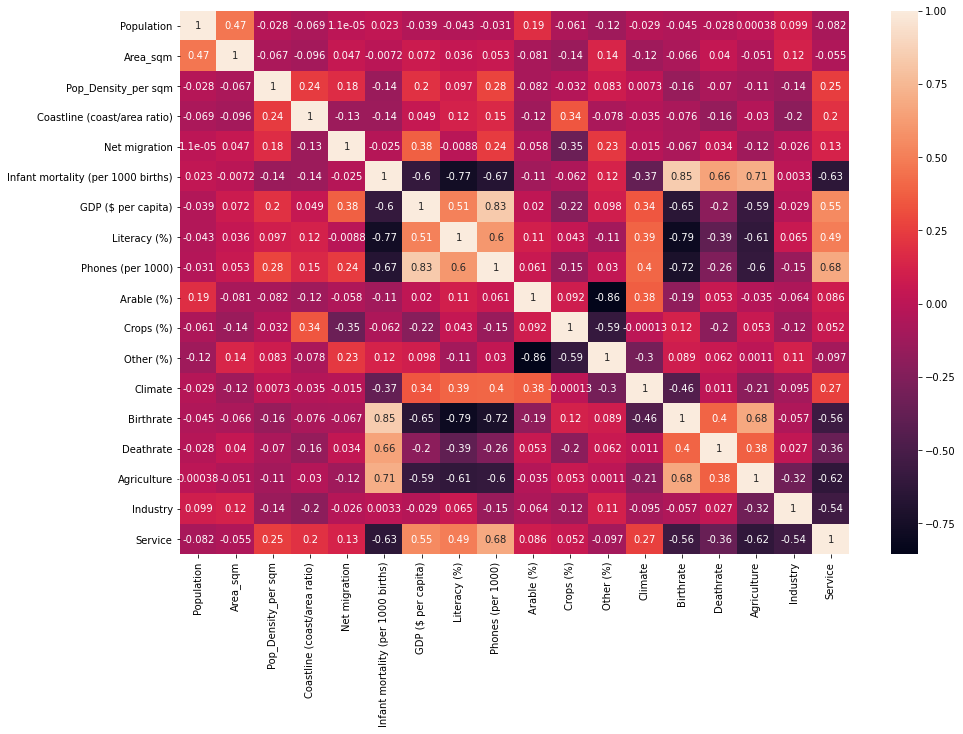

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

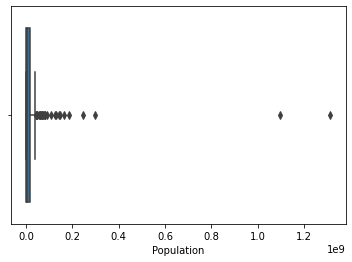

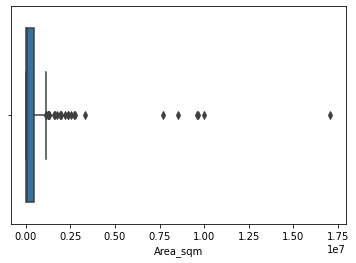

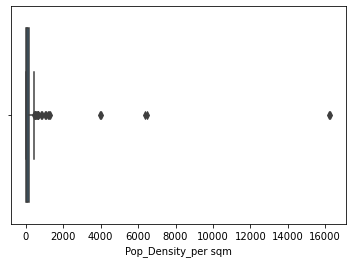

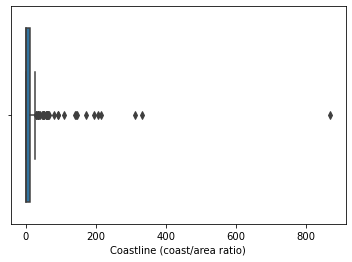

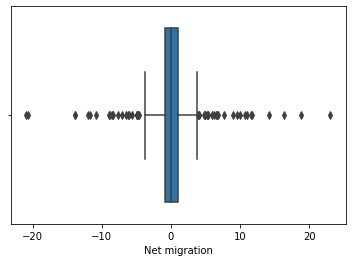

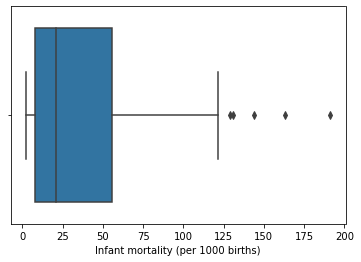

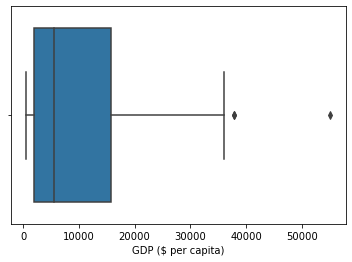

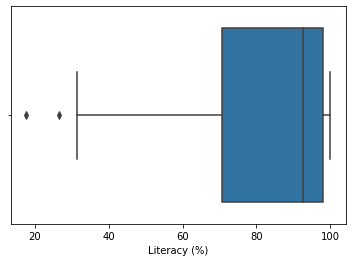

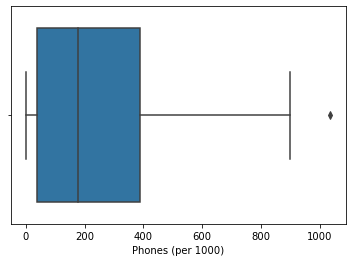

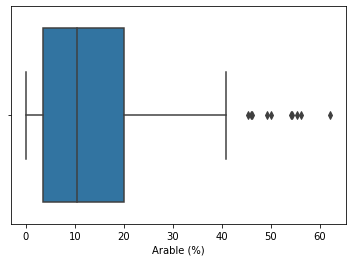

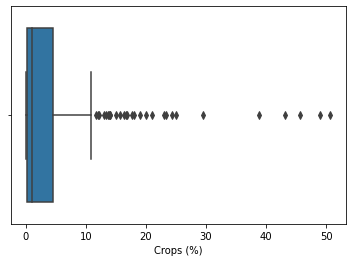

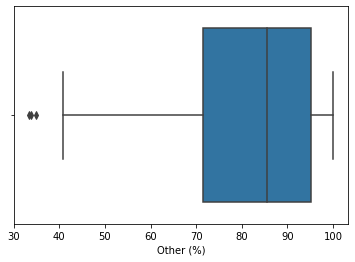

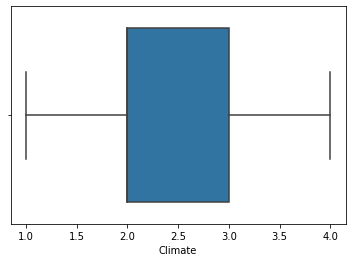

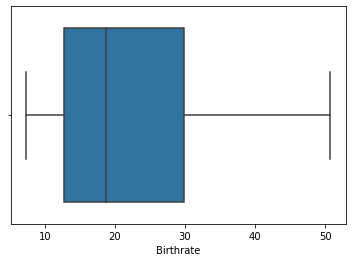

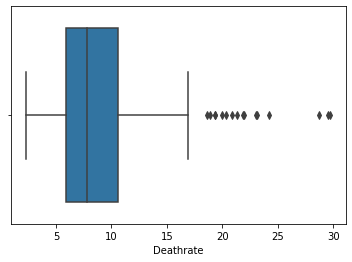

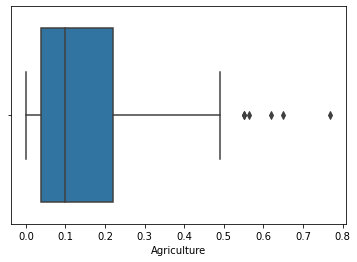

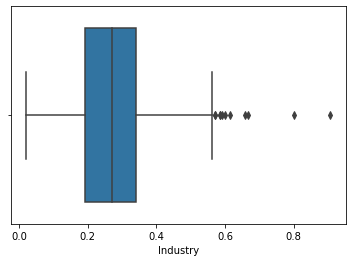

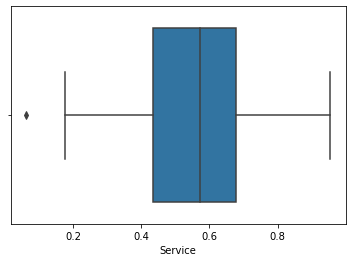

In [57]:
for i in df_imp.columns:
    sns.boxplot(df[i])
    plt.show()

In [63]:
df[df['GDP ($ per capita)']>35000]

,,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,Region,,,,,,,,,,,,,,,,,,
Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860
Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


In [58]:
df.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

### Buliding an OLS Model to check the performance

In [64]:
X=df_imp.drop(['GDP ($ per capita)'],axis=1)

In [65]:
y=df_imp['GDP ($ per capita)']

In [66]:
Xc=sm.add_constant(X)

In [67]:
model1=sm.OLS(y,Xc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     38.40
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.17e-54
Time:                        11:48:46   Log-Likelihood:                -2242.3
No. Observations:                 226   AIC:                             4521.
Df Residuals:                     208   BIC:                             4582.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               7.024e+06   4.38e+06      1.605      0.110   -1.61e+06    1.57e+07
Population                         -2.103e-06   3.49e-06     -0.603      0.547   -8.97e-06    4.77e-06
Area_sqm                            5.608e-05      0.000      0.245      0.807      -0.000       0.001
Pop_Density_per sqm                   -0.1460      0.254     -0.574      0.566      -0.647       0.355
Coastline (coast/area ratio)          -1.1929      5.505     -0.217      0.829     -12.045       9.660
Net migration                        409.9014     78.193      5.242      0.000     255.749     564.054
Infant mortality (per 1000 births)   -42.6925     28.189     -1.515      0.131     -98.265      12.880
Literacy (%)                          -6.6743     30.403     -0.220      0.826     -66.611      53.263
Phones (per 1000)                     31.3510      2.715     11.546      0.000      25.998      36.704
Arable (%)                          -6.98e+04   4.38e+04     -1.595      0.112   -1.56e+05    1.65e+04
Crops (%)                          -6.979e+04   4.38e+04     -1.595      0.112   -1.56e+05    1.65e+04
Other (%)                          -6.977e+04   4.38e+04     -1.595      0.112   -1.56e+05    1.65e+04
Climate                             -204.3414    648.584     -0.315      0.753   -1482.983    1074.300
Birthrate                            -57.7286     77.069     -0.749      0.455    -209.665      94.208
Deathrate                            198.0415    109.690      1.805      0.072     -18.205     414.288
Agriculture                          -4.4e+04   3.52e+04     -1.250      0.213   -1.13e+05    2.54e+04
Industry                            -3.77e+04   3.54e+04     -1.066      0.288   -1.07e+05     3.2e+04
Service                            -4.353e+04   3.58e+04     -1.215      0.226   -1.14e+05    2.71e+04
==============================================================================
Omnibus:                       79.042   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.155
Skew:                           1.096   Prob(JB):                    1.21e-143
Kurtosis:                      11.067   Cond. No.                     1.55e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Multicollinearity : VIF
# Scatter plots : Linearity
#                : Homoscadasticity
# Not normal [resids], Normality of residual doesn't satisfy

In [ ]:
# Transformations : Target

### Applying Log Transofrmation to reduce the residual skewness

In [68]:
y_log=np.log(df_imp['GDP ($ per capita)'])

In [70]:
X=df_imp.drop(['GDP ($ per capita)'],axis=1)
y=y_log
Xc=sm.add_constant(X)
model2=sm.OLS(y,Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     68.93
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.32e-75
Time:                        12:00:25   Log-Likelihood:                -147.16
No. Observations:                 226   AIC:                             330.3
Df Residuals:                     208   BIC:                             391.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1118.4325    412.096      2.714      0.007     306.012    1930.853
Population                         -1.188e-10   3.28e-10     -0.362      0.718   -7.66e-10    5.28e-10
Area_sqm                           -8.779e-09   2.16e-08     -0.407      0.685   -5.13e-08    3.38e-08
Pop_Density_per sqm                -1.765e-05   2.39e-05     -0.738      0.462   -6.48e-05    2.95e-05
Coastline (coast/area ratio)           0.0002      0.001      0.415      0.679      -0.001       0.001
Net migration                          0.0235      0.007      3.198      0.002       0.009       0.038
Infant mortality (per 1000 births)    -0.0095      0.003     -3.568      0.000      -0.015      -0.004
Literacy (%)                           0.0002      0.003      0.068      0.946      -0.005       0.006
Phones (per 1000)                      0.0022      0.000      8.676      0.000       0.002       0.003
Arable (%)                           -11.0448      4.120     -2.681      0.008     -19.166      -2.923
Crops (%)                            -11.0477      4.119     -2.682      0.008     -19.168      -2.927
Other (%)                            -11.0407      4.120     -2.680      0.008     -19.162      -2.919
Climate                               -0.1407      0.061     -2.305      0.022      -0.261      -0.020
Birthrate                             -0.0331      0.007     -4.564      0.000      -0.047      -0.019
Deathrate                              0.0272      0.010      2.630      0.009       0.007       0.048
Agriculture                           -5.9985      3.313     -1.810      0.072     -12.531       0.534
Industry                              -4.4027      3.329     -1.323      0.187     -10.965       2.159
Service                               -5.2379      3.372     -1.553      0.122     -11.886       1.410
==============================================================================
Omnibus:                       29.112   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.869
Skew:                          -0.830   Prob(JB):                     3.63e-09
Kurtosis:                       4.172   Cond. No.                     1.55e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

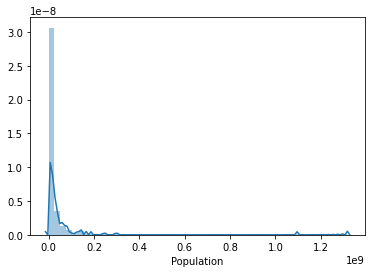

In [72]:
sns.distplot(df_imp['Population'])

### Applying BOXCOX Transofrmation and checking the residual skewness

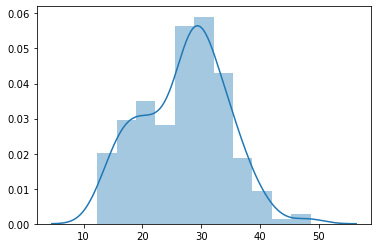

In [71]:

pop_trns,lam=stats.boxcox(df_imp['Population'])
sns.distplot(pop_trns)

# org_pop=inv_boxcox(pop_trns,lam)

In [96]:
df_new=df_imp.copy()
df_new['Population']=pop_trns

In [97]:
X=df_new.drop(['GDP ($ per capita)'],axis=1)
y=y_log
Xc=sm.add_constant(X)
model3=sm.OLS(y,Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     70.96
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.05e-76
Time:                        12:30:53   Log-Likelihood:                -144.37
No. Observations:                 226   AIC:                             324.7
Df Residuals:                     208   BIC:                             386.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1099.8597    407.012      2.702      0.007     297.463    1902.257
Population                             0.0150      0.007      2.308      0.022       0.002       0.028
Area_sqm                           -3.768e-08   2.15e-08     -1.751      0.081   -8.01e-08    4.74e-09
Pop_Density_per sqm                -2.279e-05   2.37e-05     -0.961      0.338   -6.95e-05     2.4e-05
Coastline (coast/area ratio)           0.0004      0.001      0.834      0.405      -0.001       0.001
Net migration                          0.0236      0.007      3.241      0.001       0.009       0.038
Infant mortality (per 1000 births)    -0.0102      0.003     -3.901      0.000      -0.015      -0.005
Literacy (%)                           0.0007      0.003      0.253      0.801      -0.005       0.006
Phones (per 1000)                      0.0023      0.000      9.084      0.000       0.002       0.003
Arable (%)                           -10.8684      4.069     -2.671      0.008     -18.890      -2.847
Crops (%)                            -10.8661      4.068     -2.671      0.008     -18.886      -2.846
Other (%)                            -10.8613      4.069     -2.669      0.008     -18.882      -2.840
Climate                               -0.1566      0.061     -2.581      0.011      -0.276      -0.037
Birthrate                             -0.0317      0.007     -4.432      0.000      -0.046      -0.018
Deathrate                              0.0304      0.010      2.999      0.003       0.010       0.050
Agriculture                           -5.8144      3.274     -1.776      0.077     -12.268       0.640
Industry                              -4.3212      3.288     -1.314      0.190     -10.803       2.161
Service                               -4.9847      3.333     -1.496      0.136     -11.555       1.586
==============================================================================
Omnibus:                       23.372   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.984
Skew:                          -0.728   Prob(JB):                     5.08e-07
Kurtosis:                       3.978   Cond. No.                     2.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applying BOXCOX Transofrmation and checking the residual skewness

In [98]:
df_new['Pop_Density_per sqm']=np.sqrt(df_new['Pop_Density_per sqm'])

In [160]:
X=df_new.drop(['GDP ($ per capita)'],axis=1)
y=y_log
Xc=sm.add_constant(X)
model4=sm.OLS(y,Xc).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     71.48
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           5.48e-77
Time:                        14:31:36   Log-Likelihood:                -143.66
No. Observations:                 226   AIC:                             323.3
Df Residuals:                     208   BIC:                             384.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1085.3134    405.923      2.674      0.008     285.063    1885.564
Population                             0.0155      0.007      2.379      0.018       0.003       0.028
Area_sqm                           -4.114e-08   2.17e-08     -1.899      0.059   -8.38e-08    1.56e-09
Pop_Density_per sqm                   -0.0039      0.003     -1.499      0.135      -0.009       0.001
Coastline (coast/area ratio)           0.0005      0.001      0.965      0.336      -0.001       0.002
Net migration                          0.0242      0.007      3.328      0.001       0.010       0.038
Infant mortality (per 1000 births)    -0.0101      0.003     -3.884      0.000      -0.015      -0.005
Literacy (%)                           0.0005      0.003      0.179      0.858      -0.005       0.006
Phones (per 1000)                      0.0024      0.000      9.200      0.000       0.002       0.003
Arable (%)                           -10.7254      4.058     -2.643      0.009     -18.725      -2.726
Crops (%)                            -10.7231      4.057     -2.643      0.009     -18.722      -2.725
Other (%)                            -10.7188      4.058     -2.642      0.009     -18.718      -2.719
Climate                               -0.1579      0.061     -2.610      0.010      -0.277      -0.039
Birthrate                             -0.0316      0.007     -4.439      0.000      -0.046      -0.018
Deathrate                              0.0295      0.010      2.908      0.004       0.009       0.049
Agriculture                           -5.5080      3.118     -1.766      0.079     -11.655       0.639
Industry                              -4.0006      3.139     -1.275      0.204     -10.188       2.187
Service                               -4.6381      3.182     -1.457      0.147     -10.912       1.636
==============================================================================
Omnibus:                       22.157   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.184
Skew:                          -0.702   Prob(JB):                     1.25e-06
Kurtosis:                       3.957   Cond. No.                     2.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### SQRT Transofrmation techinque helped in reducing the residual skewness to the best.

### Checking for Multicollinearity

In [94]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
vif['Features']=df_new.columns
vif.sort_values(by='VIF',ascending=False)

,VIF,Features
0,30.301944,Population
7,27.039597,Literacy (%)
12,18.628422,Birthrate
11,18.084566,Climate
5,16.930722,Infant mortality (per 1000 births)
13,11.343488,Deathrate
8,10.899781,Phones (per 1000)
6,8.401993,GDP ($ per capita)
15,8.180124,Industry
14,6.189512,Agriculture


In [93]:
df_new=df_new.drop(['Service'],axis=1)

#### Dropped service as it is having the highest VIF 

In [ ]:
# Traget is Transformed
# Population : log
# Density per sqr met : Trans : sqrt
# Other (%)  Removed   # Not Required 

In [92]:
X=df_new.drop(['GDP ($ per capita)'],axis=1)
y=y_log   
Xc=sm.add_constant(X)
model5=sm.OLS(y,Xc).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     73.42
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.86e-76
Time:                        12:25:38   Log-Likelihood:                -147.39
No. Observations:                 226   AIC:                             328.8
Df Residuals:                     209   BIC:                             386.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 13.0470      3.212      4.061      0.000       6.714      19.380
Population                             0.0158      0.007      2.393      0.018       0.003       0.029
Area_sqm                             -4.4e-08   2.19e-08     -2.005      0.046   -8.72e-08   -7.45e-10
Pop_Density_per sqm                   -0.0042      0.003     -1.567      0.119      -0.009       0.001
Coastline (coast/area ratio)           0.0005      0.001      0.970      0.333      -0.001       0.002
Net migration                          0.0239      0.007      3.238      0.001       0.009       0.038
Infant mortality (per 1000 births)    -0.0111      0.003     -4.224      0.000      -0.016      -0.006
Literacy (%)                           0.0006      0.003      0.204      0.839      -0.005       0.006
Phones (per 1000)                      0.0024      0.000      9.059      0.000       0.002       0.003
Arable (%)                            -0.0066      0.003     -2.195      0.029      -0.013      -0.001
Crops (%)                             -0.0054      0.005     -1.116      0.266      -0.015       0.004
Climate                               -0.1686      0.061     -2.754      0.006      -0.289      -0.048
Birthrate                             -0.0283      0.007     -3.978      0.000      -0.042      -0.014
Deathrate                              0.0296      0.010      2.876      0.004       0.009       0.050
Agriculture                           -5.1939      3.160     -1.644      0.102     -11.423       1.036
Industry                              -3.6140      3.180     -1.137      0.257      -9.882       2.654
Service                               -4.2684      3.224     -1.324      0.187     -10.625       2.088
==============================================================================
Omnibus:                       21.289   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.290
Skew:                          -0.674   Prob(JB):                     1.95e-06
Kurtosis:                       3.988   Cond. No.                     3.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Service Removed  # Not Required

In [95]:
X=df_new.drop(['GDP ($ per capita)'],axis=1)
y=y_log   
Xc=sm.add_constant(X)
model6=sm.OLS(y,Xc).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     77.91
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           4.90e-77
Time:                        12:29:17   Log-Likelihood:                -148.33
No. Observations:                 226   AIC:                             328.7
Df Residuals:                     210   BIC:                             383.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  8.8303      0.417     21.194      0.000       8.009       9.652
Population                             0.0160      0.007      2.429      0.016       0.003       0.029
Area_sqm                           -4.481e-08    2.2e-08     -2.040      0.043   -8.81e-08    -1.5e-09
Pop_Density_per sqm                   -0.0055      0.002     -2.251      0.025      -0.010      -0.001
Coastline (coast/area ratio)           0.0005      0.001      0.924      0.356      -0.001       0.002
Net migration                          0.0235      0.007      3.190      0.002       0.009       0.038
Infant mortality (per 1000 births)    -0.0110      0.003     -4.174      0.000      -0.016      -0.006
Literacy (%)                           0.0007      0.003      0.254      0.800      -0.005       0.006
Phones (per 1000)                      0.0023      0.000      8.957      0.000       0.002       0.003
Arable (%)                            -0.0065      0.003     -2.137      0.034      -0.012      -0.001
Crops (%)                             -0.0055      0.005     -1.142      0.255      -0.015       0.004
Climate                               -0.1671      0.061     -2.724      0.007      -0.288      -0.046
Birthrate                             -0.0281      0.007     -3.945      0.000      -0.042      -0.014
Deathrate                              0.0281      0.010      2.745      0.007       0.008       0.048
Agriculture                           -1.0434      0.395     -2.645      0.009      -1.821      -0.266
Industry                               0.5755      0.307      1.872      0.063      -0.030       1.181
==============================================================================
Omnibus:                       20.950   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.683
Skew:                          -0.669   Prob(JB):                     2.65e-06
Kurtosis:                       3.968   Cond. No.                     2.78e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
df_new.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,33.939502,647500.0,6.928203,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,27.096688,28748.0,11.162437,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [80]:
linreg=LinearRegression()

### Using Feature selection Technique to select the best features that are significant for model building 

In [101]:
frwd=sfs(estimator=linreg,k_features='best',scoring='neg_mean_squared_error',forward=True)
frwd_model=frwd.fit(X,y)
frwd_model.k_feature_names_

('Population',
 'Area_sqm',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'Phones (per 1000)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service')

In [109]:
y_new=np.array(y)

In [111]:
y=y_new.reshape(1,-1)

In [117]:
np.log(df['GDP ($ per capita)'])

Country             Region                             
Afghanistan         ASIA (EX. NEAR EAST)                   6.551080
Albania             EASTERN EUROPE                         8.411833
Algeria             NORTHERN AFRICA                        8.699515
American Samoa      OCEANIA                                8.987197
Andorra             WESTERN EUROPE                         9.852194
                                                             ...   
Wallis and Futuna   OCEANIA                                8.216088
West Bank           NEAR EAST                              6.684612
Yemen               NEAR EAST                              6.684612
Zambia              SUB-SAHARAN AFRICA                     6.684612
Zimbabwe            SUB-SAHARAN AFRICA                     7.549609
Name: GDP ($ per capita), Length: 226, dtype: float64

In [118]:
df_new['GDP ($ per capita)']=np.log(df_new['GDP ($ per capita)'])

In [119]:
X=df_new.drop(['GDP ($ per capita)'],axis=1)
y=df_new['GDP ($ per capita)']
Xc=sm.add_constant(X)
model6=sm.OLS(y,Xc).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     71.48
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           5.48e-77
Time:                        13:00:55   Log-Likelihood:                -143.66
No. Observations:                 226   AIC:                             323.3
Df Residuals:                     208   BIC:                             384.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               1085.3134    405.923      2.674      0.008     285.063    1885.564
Population                             0.0155      0.007      2.379      0.018       0.003       0.028
Area_sqm                           -4.114e-08   2.17e-08     -1.899      0.059   -8.38e-08    1.56e-09
Pop_Density_per sqm                   -0.0039      0.003     -1.499      0.135      -0.009       0.001
Coastline (coast/area ratio)           0.0005      0.001      0.965      0.336      -0.001       0.002
Net migration                          0.0242      0.007      3.328      0.001       0.010       0.038
Infant mortality (per 1000 births)    -0.0101      0.003     -3.884      0.000      -0.015      -0.005
Literacy (%)                           0.0005      0.003      0.179      0.858      -0.005       0.006
Phones (per 1000)                      0.0024      0.000      9.200      0.000       0.002       0.003
Arable (%)                           -10.7254      4.058     -2.643      0.009     -18.725      -2.726
Crops (%)                            -10.7231      4.057     -2.643      0.009     -18.722      -2.725
Other (%)                            -10.7188      4.058     -2.642      0.009     -18.718      -2.719
Climate                               -0.1579      0.061     -2.610      0.010      -0.277      -0.039
Birthrate                             -0.0316      0.007     -4.439      0.000      -0.046      -0.018
Deathrate                              0.0295      0.010      2.908      0.004       0.009       0.049
Agriculture                           -5.5080      3.118     -1.766      0.079     -11.655       0.639
Industry                              -4.0006      3.139     -1.275      0.204     -10.188       2.187
Service                               -4.6381      3.182     -1.457      0.147     -10.912       1.636
==============================================================================
Omnibus:                       22.157   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.184
Skew:                          -0.702   Prob(JB):                     1.25e-06
Kurtosis:                       3.957   Cond. No.                     2.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
df.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

### Splitting the Data into Train and Test Data

In [171]:
X=df_new.drop(['GDP ($ per capita)'],axis=1)
y=df_new['GDP ($ per capita)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)
# X_train,y_train,X_test,y_test

### Scaling the Data 

In [172]:
sc=StandardScaler()

In [173]:
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [174]:
las=Lasso(alpha=0.0001)
las_model=las.fit(X_train_sc,y_train)
las_model.coef_

C:\Users\Kanchan Wadhava\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7311820104692615, tolerance: 0.02564715336136867
  model = cd_fast.enet_coordinate_descent(


array([ 0.12833717, -0.05857958, -0.01596123,  0.02182188,  0.08990268,
       -0.35380866,  0.00271259,  0.57254975, -0.08568438, -0.02926652,
        0.        , -0.08479271, -0.27908923,  0.12133195, -1.03819556,
       -0.69712556, -1.01467589])

In [175]:
las_model.score(X_train_sc,y_train)

0.8492188815979071

In [185]:
np.sqrt(mean_squared_error(np.exp(y_train),np.exp(las_model.predict(X_train_sc))))

5226.246660383802

In [ ]:
np.sqrt(mean_squared_error((y_train)^2,(las_model.predict(X_train_sc)^2)))

In [186]:
np.sqrt(mean_squared_error(np.exp(y_test),np.exp(las_model.predict(X_test_sc))))

5506.8511292748135

In [86]:
df_new.columns

Index(['Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [154]:
X=df_new[['Population',
 'Area_sqm',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'Phones (per 1000)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']]

In [155]:
y=df_new['GDP ($ per capita)']

In [156]:
Xc=sm.add_constant(X)

In [157]:
model=sm.OLS(y,Xc).fit()

In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.01
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.07e-79
Time:                        14:28:55   Log-Likelihood:                -149.08
No. Observations:                 226   AIC:                             324.2
Df Residuals:                     213   BIC:                             368.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 14.1824      2.928      4.844      0.000       8.412      19.953
Population                             0.0128      0.006      2.188      0.030       0.001       0.024
Area_sqm                           -3.577e-08   2.12e-08     -1.689      0.093   -7.75e-08    5.97e-09
Net migration                          0.0212      0.007      2.992      0.003       0.007       0.035
Infant mortality (per 1000 births)    -0.0113      0.003     -4.413      0.000      -0.016      -0.006
Phones (per 1000)                      0.0023      0.000      9.022      0.000       0.002       0.003
Other (%)                              0.0064      0.002      2.831      0.005       0.002       0.011
Climate                               -0.1667      0.061     -2.747      0.007      -0.286      -0.047
Birthrate                             -0.0285      0.006     -4.407      0.000      -0.041      -0.016
Deathrate                              0.0300      0.010      2.993      0.003       0.010       0.050
Agriculture                           -6.8297      2.881     -2.371      0.019     -12.509      -1.151
Industry                              -5.2554      2.905     -1.809      0.072     -10.981       0.470
Service                               -5.9584      2.930     -2.033      0.043     -11.735      -0.182
==============================================================================
Omnibus:                       24.313   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.771
Skew:                          -0.719   Prob(JB):                     1.26e-07
Kurtosis:                       4.142   Cond. No.                     3.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for HomoSkedaciticity

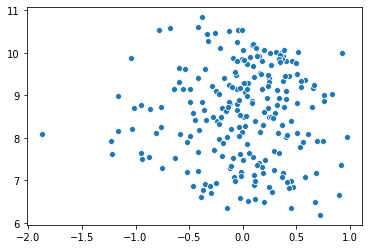

In [161]:
sns.scatterplot(model4.resid,model4.predict(Xc))

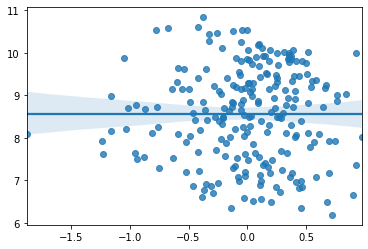

In [162]:
sns.regplot(model4.resid,model4.predict(Xc))

### checking for  Linearity

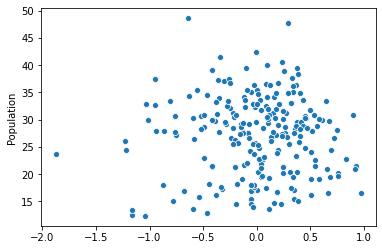

In [163]:
sns.scatterplot(model4.resid,df_new['Population'])

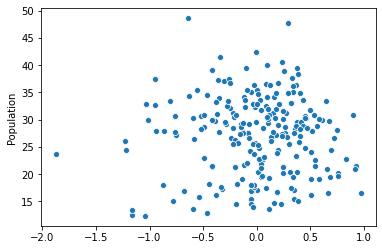

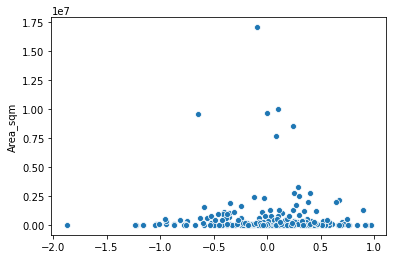

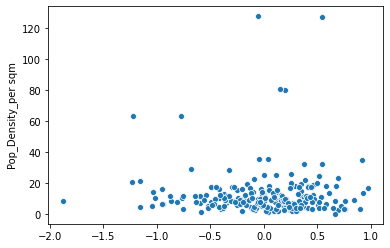

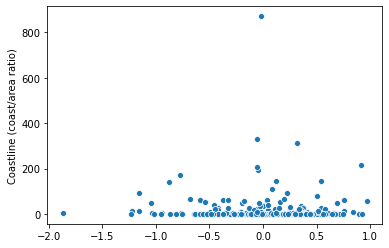

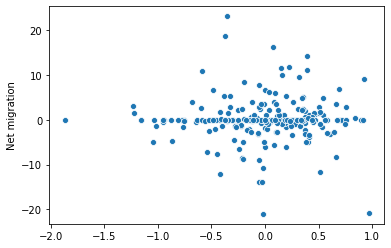

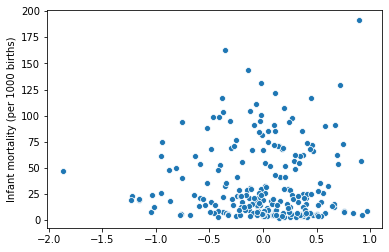

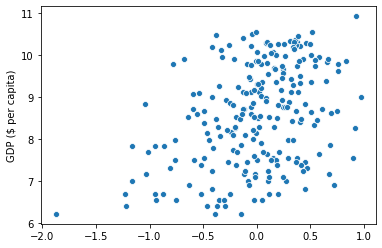

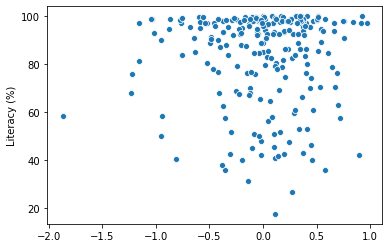

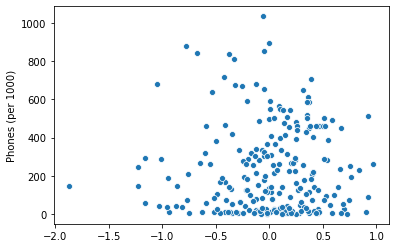

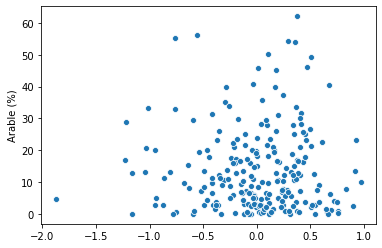

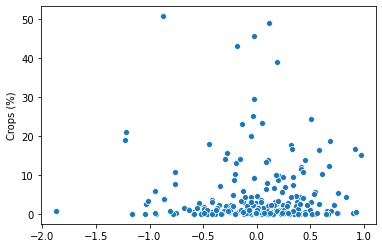

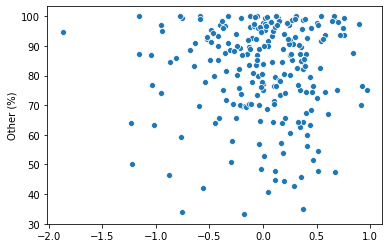

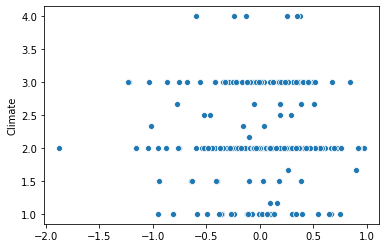

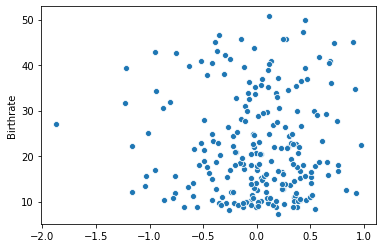

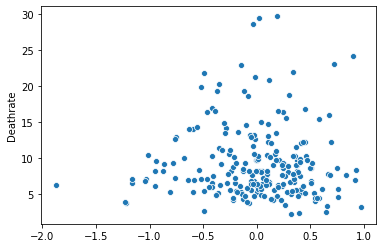

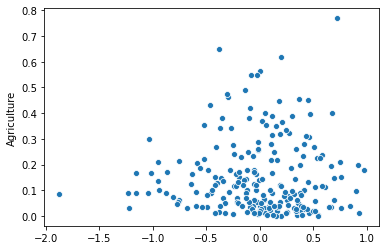

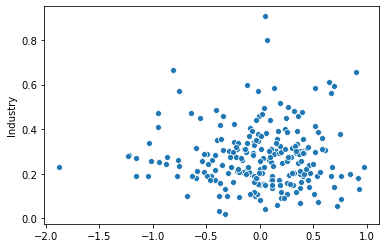

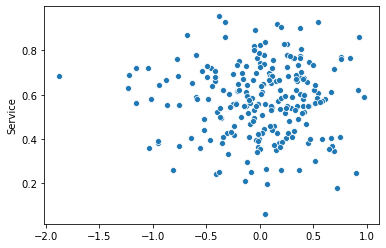

In [165]:
for i in df_new.columns:
    sns.scatterplot(model4.resid,df_new[i])
    plt.show()

### Bulding a Model using Sklearn Linear Regression

In [166]:
lin=LinearRegression()

In [177]:
lin_model=lin.fit(X_train_sc,y_train)

In [178]:
lin_model.score(X_train_sc,y_train)

0.8560898277738938

In [179]:
np.sqrt(mean_squared_error(y_train,lin_model.predict(X_train_sc)))

0.45282362628191897

In [183]:
np.sqrt(mean_squared_error(np.exp(y_train),np.exp(lin_model.predict(X_train_sc))))

5268.055622315272

In [184]:
np.sqrt(mean_squared_error(np.exp(y_test),np.exp(lin_model.predict(X_test_sc))))

5783.645803510942

In [181]:
df_imp['GDP ($ per capita)'].describe()

count      226.000000
mean      9689.823009
std      10049.138513
min        500.000000
25%       1900.000000
50%       5550.000000
75%      15700.000000
max      55100.000000
Name: GDP ($ per capita), dtype: float64

In [ ]:
Model
y: log transformed
Population: Boxcox Trandformed
pop desnsity: sqrt tran
    

In [167]:
df_new.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,33.939502,647500.0,6.928203,0.00,23.06,163.07,6.551080,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,27.096688,28748.0,11.162437,1.26,-4.93,21.52,8.411833,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [168]:
df_imp.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


### Applying Regularization 

In [187]:
rig=Ridge()

### Hypertuning The parameters

In [192]:
params={'alpha':[0.0000001,0.000001,0.0002,0.0001,0.001,0.01,0.1,0.2,0.5,0.7,0.9,1,2]}

In [193]:
grid=GridSearchCV(Ridge(),param_grid=params,cv=3,scoring='r2')

In [194]:
rid_grid=grid.fit(X_train_sc,y_train)  # (X,y)  # best_param

In [195]:
rid_grid.best_params_

{'alpha': 1e-06}

In [196]:
rig=Ridge(alpha=0.000001)
rig_model=rig.fit(X_train_sc,y_train)

In [197]:
np.sqrt(mean_squared_error(np.exp(y_train),np.exp(rig_model.predict(X_train_sc))))

5264.862518186336

In [198]:
np.sqrt(mean_squared_error(np.exp(y_test),np.exp(rig_model.predict(X_test_sc))))

5774.874363062976

In [199]:
rig_model.score(X_train_sc,y_train)

0.8560788643478872

### MODEL is performing with 0.856 coefficent of Determination and 5774 RMSE